In [19]:
import numpy as np
from basicReservoir import ESN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import ode
from scipy.interpolate import UnivariateSpline

In [17]:
def lorenz(t, M, s, r, b):
    x, y, z = M
    f = [s*(y - x), r*x - y - x*z, x*y - b*z]
    return f

solver = ode(lorenz)
solver.set_integrator('dop853')

s = 10
r = 28
b = 8/3.0
solver.set_f_params(s,r,b)

t0 = 0.0
M0 = [0., 1., 1.05]
solver.set_initial_value(M0, t0)

t1 = 400
N = 40000
t = np.linspace(t0, t1, N)
sol = np.empty((N, 3))
sol[0] = M0

k = 1
while solver.successful() and solver.t < t1:
    solver.integrate(t[k])
    sol[k] = solver.y
    k += 1

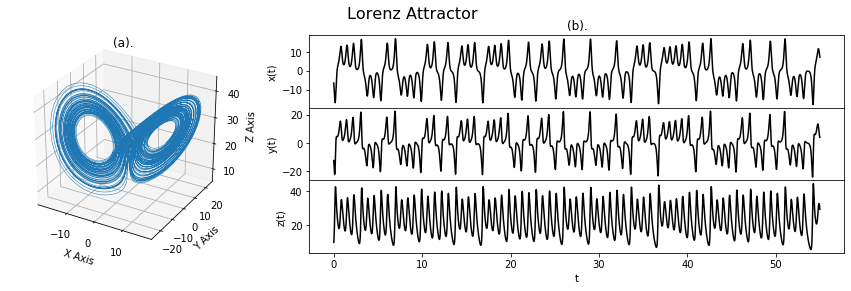

In [20]:
# Plot

tlist1=np.array(range(0,8000-2500))/100

fig = plt.figure(constrained_layout=False)
gs = fig.add_gridspec(nrows=3, ncols=3,wspace=0.3,hspace=0.)

plta = fig.add_subplot(gs[:, 0],projection='3d')
plta.set_xlabel("X Axis")
plta.set_ylabel("Y Axis")
plta.set_zlabel("Z Axis")
plta.set_title("(a).")
plta.plot(sol[2000:10000,0], sol[2000:10000,1], sol[2000:10000,2], lw=0.5)

pltb = fig.add_subplot(gs[0, 1:])
pltb.plot(tlist1,sol[2500:8000,0],'k')
pltb.set_ylabel("x(t)")
pltb.set_title("(b).")
plt.setp(pltb.get_xticklabels(), visible=False)

pltc = fig.add_subplot(gs[1, 1:], sharex=pltb)
pltc.plot(tlist1,sol[2500:8000,1],'k')
pltc.set_ylabel("y(t)")
plt.setp(pltc.get_xticklabels(), visible=False)


pltd = fig.add_subplot(gs[2, 1:], sharex=pltb)
pltd.plot(tlist1,sol[2500:8000,2],'k')
pltd.set_ylabel("z(t)")
pltd.set_xlabel("t")


fig.suptitle("Lorenz Attractor", fontsize=16)
fig.set_size_inches(w=15,h=4)

In [21]:
"""
n_reservoir = 300, leak=0.75, noise = 0.001, bias=1,
          spectral_radius = 0.8,sparsity=0.5, fb_spectral_radius=0.8, fb_sparsity=0.5
"""
esn = ESN(n_outputs = 3, 
          n_reservoir = 600,
          # leak=0.8, noise = 0.001
          bias=1,
          spectral_radius = 0.7, sparsity=0.7,
          fb_spectral_radius = 0.8, fb_sparsity = 0.3
         )


In [30]:
trainlen = 30000 # timestep in the training
future = 10000 # timestep in the prediction
Lambda = 0.9056
F = Lambda/100
tlist = np.array(range(0,future))*F #scale timestep
time = np.array(range(0,future))/100

In [31]:
pred_training = esn.fit(sol[:trainlen])
prediction = esn.predict(future)
print("test error: \n"+str(np.sqrt(np.mean((prediction - sol[trainlen:trainlen+future])**2))))

test error: 
11.978971972118423


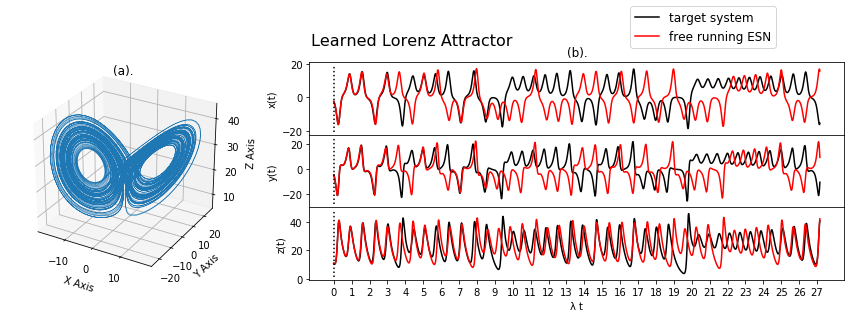

In [46]:
fig = plt.figure(constrained_layout=False)
gs = fig.add_gridspec(nrows=3, ncols=3,wspace=0.3,hspace=0.)

plta = fig.add_subplot(gs[:, 0],projection='3d')
plta.set_xlabel("X Axis")
plta.set_ylabel("Y Axis")
plta.set_zlabel("Z Axis")
plta.set_title("(a).")
plta.plot(prediction[:,0], prediction[:,1], prediction[:,2], lw=0.5)

pltb = fig.add_subplot(gs[0, 1:])
pltb.plot(tlist[0:3000],sol[trainlen:trainlen+3000,0],'k',label="target system")
pltb.plot(tlist[0:3000],prediction[0:3000,0],'r', label="free running ESN")
lo,hi = pltb.get_ylim()
pltb.plot([tlist[0],tlist[0]],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
pltb.set_ylabel("x(t)")
pltb.set_title("(b).")
plt.setp(pltb.get_xticklabels(), visible=False)


pltc = fig.add_subplot(gs[1, 1:], sharex=pltb)
pltc.plot(tlist[0:3000],sol[trainlen:trainlen+3000,1],'k',label="target system")
pltc.plot(tlist[0:3000],prediction[0:3000,1],'r', label="free running ESN")
lo1,hi1 = pltc.get_ylim()
pltc.plot([tlist[0],tlist[0]],[lo1+np.spacing(1),hi1-np.spacing(1)],'k:')
pltc.set_ylabel("y(t)")
plt.setp(pltc.get_xticklabels(), visible=False)


pltd = fig.add_subplot(gs[2, 1:], sharex=pltb)
pltd.plot(tlist[0:3000],sol[trainlen:trainlen+3000,2],'k',label="target system")
pltd.plot(tlist[0:3000],prediction[0:3000,2],'r', label="free running ESN")
lo2,hi2 = pltd.get_ylim()
pltd.plot([tlist[0],tlist[0]],[lo2+np.spacing(1),hi2-np.spacing(1)],'k:')
plt.xticks(range(28))
pltd.set_ylabel("z(t)")
pltd.set_xlabel("\u03BB t")


pltd.legend(loc=(0.6,3.2),fontsize='large')


fig.suptitle("Learned Lorenz Attractor", fontsize=16)
fig.set_size_inches(w=15,h=4)

ESN with Square = True 

In [4]:
esn1 = ESN(n_inputs = 1, n_outputs = 3, 
           n_reservoir = 600, square = True,
           spectral_radius = 0.7,sparsity=0.75, 
           fb_spectral_radius=0.8, fb_sparsity=0.3)

pred_training1 = esn1.fit(np.zeros(trainlen),sol[:trainlen])
prediction1 = esn1.predict(np.zeros(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction1 - sol[trainlen:trainlen+future])**2))))

test error: 
11.744582823926159


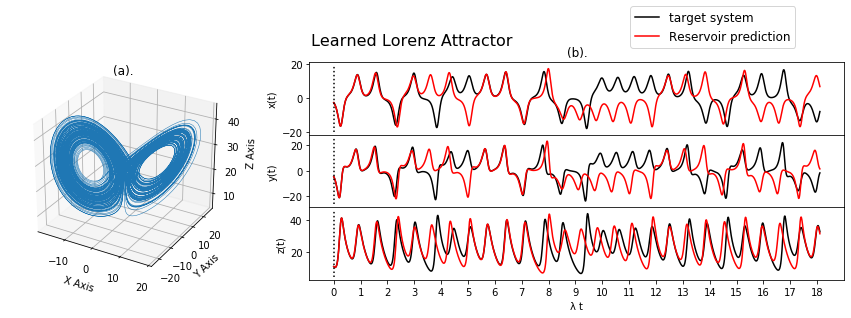

In [72]:
fig = plt.figure(constrained_layout=False)
gs = fig.add_gridspec(nrows=3, ncols=3,wspace=0.3,hspace=0.)

plta = fig.add_subplot(gs[:, 0],projection='3d')
plta.set_xlabel("X Axis")
plta.set_ylabel("Y Axis")
plta.set_zlabel("Z Axis")
plta.set_title("(a).")
plta.plot(prediction1[:,0], prediction1[:,1], prediction1[:,2], lw=0.5)

pltb = fig.add_subplot(gs[0, 1:])
pltb.plot(tlist[0:2000],sol[trainlen:trainlen+2000,0],'k',label="target system")
pltb.plot(tlist[0:2000],prediction1[0:2000,0],'r', label="Reservoir prediction")
lo,hi = pltb.get_ylim()
pltb.plot([tlist[0],tlist[0]],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
pltb.set_ylabel("x(t)")
pltb.set_title("(b).")
plt.setp(pltb.get_xticklabels(), visible=False)

pltc = fig.add_subplot(gs[1, 1:], sharex=pltb)
pltc.plot(tlist[0:2000],sol[trainlen:trainlen+2000,1],'k',label="target system")
pltc.plot(tlist[0:2000],prediction1[0:2000,1],'r', label="Reservoir prediction")
lo1,hi1 = pltc.get_ylim()
pltc.plot([tlist[0],tlist[0]],[lo1+np.spacing(1),hi1-np.spacing(1)],'k:')
pltc.set_ylabel("y(t)")
plt.setp(pltc.get_xticklabels(), visible=False)


pltd = fig.add_subplot(gs[2, 1:], sharex=pltb)
pltd.plot(tlist[0:2000],sol[trainlen:trainlen+2000,2],'k',label="target system")
pltd.plot(tlist[0:2000],prediction1[0:2000,2],'r', label="Reservoir prediction")
lo2,hi2 = pltd.get_ylim()
pltd.plot([tlist[0],tlist[0]],[lo2+np.spacing(1),hi2-np.spacing(1)],'k:')
plt.xticks(range(19))
pltd.set_ylabel("z(t)")
pltd.set_xlabel("\u03BB t")

pltd.legend(loc=(0.6,3.2),fontsize='large')


fig.suptitle("Learned Lorenz Attractor", fontsize=16)
fig.set_size_inches(w=15,h=4)

In [13]:

#NRMSE

x_spl = UnivariateSpline(time,prediction[:,0],s=0,k=3)
y_spl = UnivariateSpline(time,prediction[:,1],s=0,k=3)
z_spl = UnivariateSpline(time,prediction[:,2],s=0,k=3)
x_cal =s*(prediction[:,1] - prediction[:,0])
y_cal =r*prediction[:,0] - prediction[:,1] - prediction[:,0]*prediction[:,2]
z_cal =prediction[:,0]*prediction[:,1] - b*prediction[:,2]
dx=x_spl.derivative(n=1)
dy=y_spl.derivative(n=1)
dz=z_spl.derivative(n=1)

k1=np.stack((dx(time)-x_cal,dy(time)-y_cal,dz(time)-z_cal)).T

k=np.sqrt(np.mean(k1[0:10000,:]**2, axis=0))
print(k[0]/np.std(x_cal),k[1]/np.std(y_cal),k[2]/np.std(z_cal))

0.003928205142484291 0.0031427163865415907 0.004479698556204506


In [14]:
x_spl = UnivariateSpline(time,sol[0:future,0],s=0,k=3)
y_spl = UnivariateSpline(time,sol[0:future,1],s=0,k=3)
z_spl = UnivariateSpline(time,sol[0:future,2],s=0,k=3)
x_cal =s*(sol[0:future,1] - sol[0:future,0])
y_cal =r*sol[0:future,0] - sol[0:future,1] - sol[0:future,0]*sol[0:future,2]
z_cal =sol[0:future,0]*sol[0:future,1] - b*sol[0:future,2]
dx=x_spl.derivative(n=1)
dy=y_spl.derivative(n=1)
dz=z_spl.derivative(n=1)

k1=np.stack((dx(time)-x_cal,dy(time)-y_cal,dz(time)-z_cal)).T

k=np.sqrt(np.mean(k1[0:10000,:]**2, axis=0))
print(k[0]/np.std(x_cal),k[1]/np.std(y_cal),k[2]/np.std(z_cal))

2.4666872367669395e-05 2.7955634048705076e-05 2.6197779523237867e-05


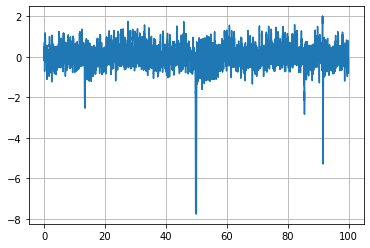

In [26]:
#plt.figure(figsize=(10,8))
plt.plot(time, k1[:,2])
plt.grid(True)
plt.show()

In [ ]:
k=np.sqrt(np.mean(k1[0:300,:]**2))
print(k)